数据形状: (100000, 64, 64, 3)


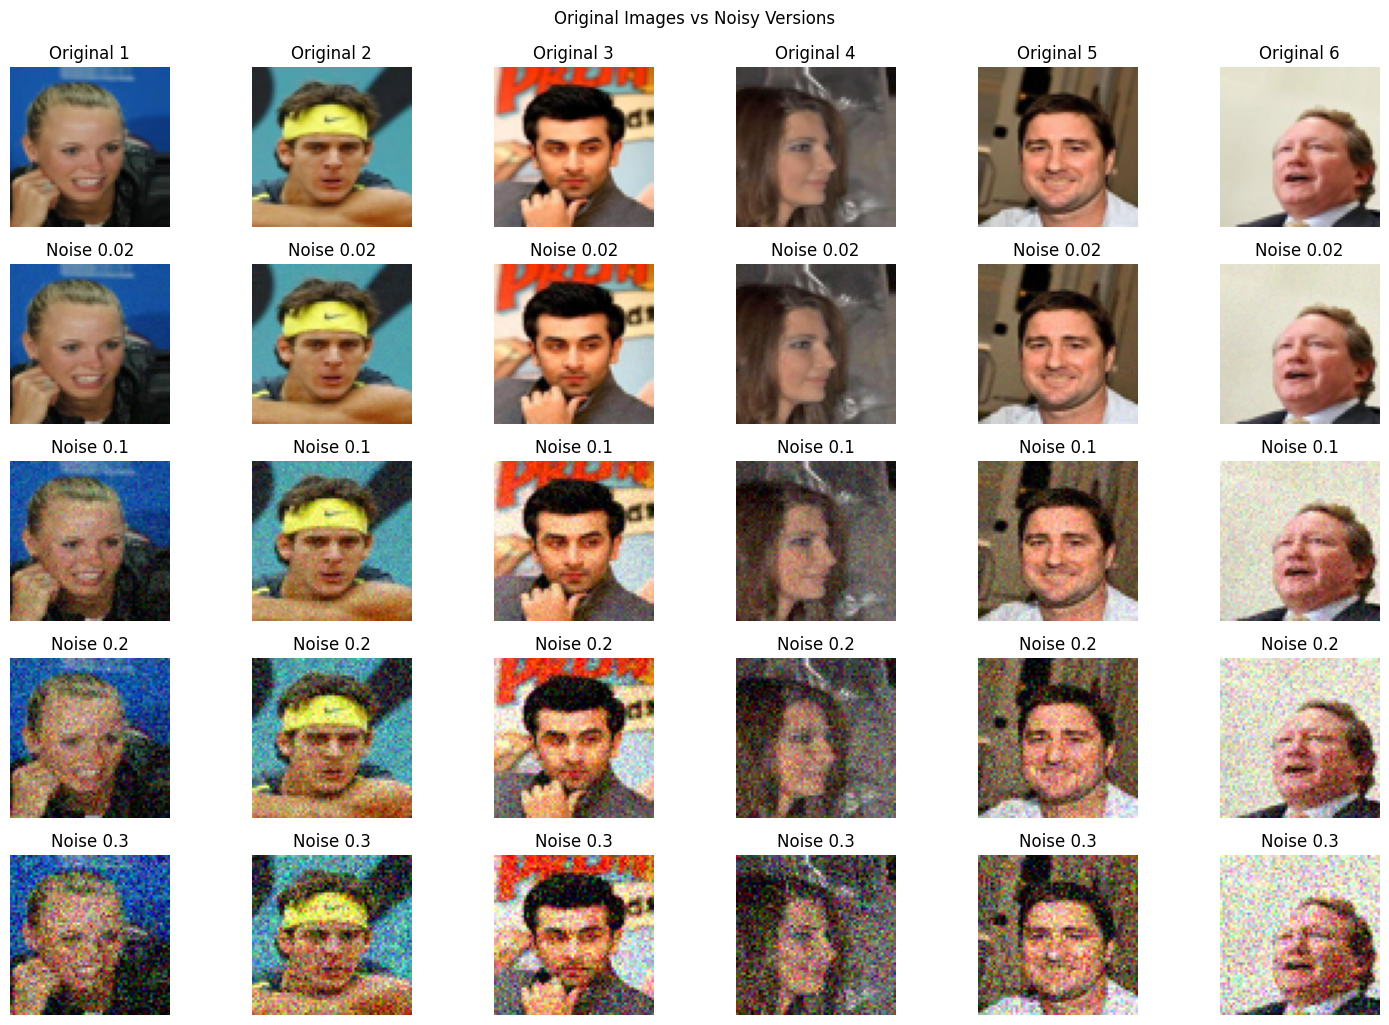


=== 噪声统计信息 ===
噪声强度 0.02: MSE = 0.000399
噪声强度 0.1: MSE = 0.009666
噪声强度 0.2: MSE = 0.037663
噪声强度 0.3: MSE = 0.077485


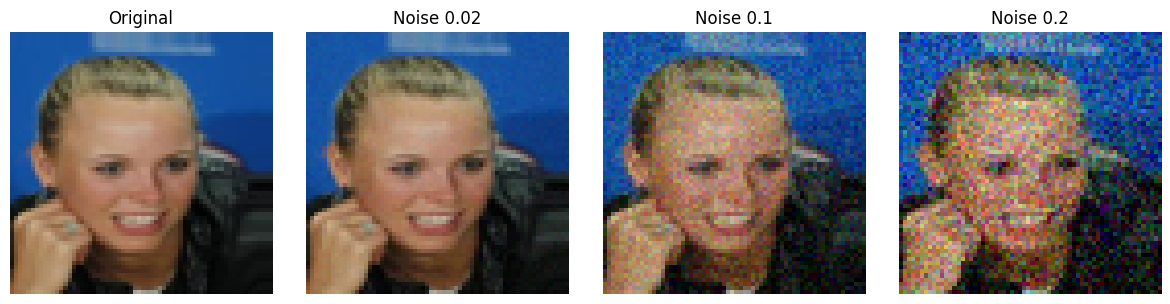

In [2]:
# noise_demo.ipynb

import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
import torchvision.transforms as transforms

# 1. 加载数据
train = np.load('D:/JupterProjects/data/trainingset.npy', allow_pickle=True)
print(f"数据形状: {train.shape}")

# 2. 数据预处理函数
def preprocess_image(img_array):
    """将numpy数组转换为标准化的torch张量"""
    if len(img_array.shape) == 4 and img_array.shape[-1] == 3:
        img_array = img_array.transpose(0, 3, 1, 2)  # NHWC -> NCHW
    
    img_tensor = torch.from_numpy(img_array).float()
    img_tensor = 2.0 * img_tensor / 255.0 - 1.0  # 归一化到[-1,1]
    return img_tensor

# 3. 添加噪声函数
def add_noise(img, noise_factor=0.1):
    """给图像添加高斯噪声"""
    noise = torch.randn_like(img) * noise_factor
    noisy_img = img + noise
    noisy_img = torch.clamp(noisy_img, -1, 1)  # 限制在[-1,1]范围
    return noisy_img

# 4. 反归一化用于显示
def denormalize(tensor):
    """将[-1,1]的张量转换回[0,1]用于显示"""
    return (tensor + 1) / 2

# 5. 选择几张图片进行演示
num_samples = 6
sample_indices = np.random.choice(len(train), num_samples, replace=False)
sample_images = train[sample_indices]

# 预处理
processed_imgs = preprocess_image(sample_images)

# 6. 生成不同强度的噪声版本
noise_factors = [0.02, 0.1, 0.2, 0.3]

# 7. 可视化
fig, axes = plt.subplots(len(noise_factors) + 1, num_samples, figsize=(15, 10))

for i in range(num_samples):
    # 原始图像
    original = denormalize(processed_imgs[i]).permute(1, 2, 0)
    axes[0, i].imshow(original)
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')
    
    # 不同噪声强度
    for j, noise_factor in enumerate(noise_factors):
        noisy = add_noise(processed_imgs[i], noise_factor)
        noisy_display = denormalize(noisy).permute(1, 2, 0)
        axes[j+1, i].imshow(noisy_display)
        axes[j+1, i].set_title(f'Noise {noise_factor}')
        axes[j+1, i].axis('off')

plt.tight_layout()
plt.suptitle('Original Images vs Noisy Versions', y=1.02)
plt.show()

# 8. 计算噪声统计信息
print("\n=== 噪声统计信息 ===")
original_img = processed_imgs[0]
for noise_factor in noise_factors:
    noisy_img = add_noise(original_img, noise_factor)
    mse = torch.mean((original_img - noisy_img) ** 2).item()
    print(f"噪声强度 {noise_factor}: MSE = {mse:.6f}")

# 9. 展示单张图像的对比
plt.figure(figsize=(12, 3))
test_img = processed_imgs[0]

for i, noise_factor in enumerate([0, 0.02, 0.1, 0.2]):
    plt.subplot(1, 4, i+1)
    if noise_factor == 0:
        display_img = denormalize(test_img).permute(1, 2, 0)
        plt.title('Original')
    else:
        noisy = add_noise(test_img, noise_factor)
        display_img = denormalize(noisy).permute(1, 2, 0)
        plt.title(f'Noise {noise_factor}')
    
    plt.imshow(display_img)
    plt.axis('off')

plt.tight_layout()
plt.show()